In [8]:
import geopandas as gpd
import pandas as pd
import os
import matplotlib.pyplot as plt

os.chdir("../")
from epitools import get_data

In [4]:
year = 2021

In [3]:
gdf = gpd.read_file("https://raw.githubusercontent.com/juaneladio/peru-geojson/master/peru_departamental_simple.geojson")
gdf = gdf.rename(columns={"NOMBDEP": "region"})
gdf.head()

,region,COUNT,FIRST_IDDP,HECTARES,geometry
0,AMAZONAS,84,01,3930646.567,"POLYGON ((-77.75893 -6.96451, -77.84586 -6.976..."
1,ANCASH,166,02,3596224.600,"POLYGON ((-77.31749 -8.53015, -77.28903 -8.589..."
2,APURIMAC,80,03,2111415.170,"POLYGON ((-72.47177 -14.66140, -72.57725 -14.6..."
3,AREQUIPA,109,04,6325588.935,"POLYGON ((-75.07333 -15.44294, -75.04965 -15.4..."
4,AYACUCHO,111,05,4350381.783,"POLYGON ((-74.34595 -12.17374, -74.32187 -12.2..."


In [6]:
df = get_data(
    country="Peru",
    year=year,
    aggregation="region",
    election="first_round",
    method="nv"
)
df.head()

,region,epi,epi_between,epi_within,year
0,AMAZONAS,0.948133,0.869461,0.078673,2021
1,ANCASH,0.964007,0.893998,0.070009,2021
2,APURIMAC,0.840779,0.792194,0.048584,2021
3,AREQUIPA,0.897090,0.848922,0.048168,2021
4,AYACUCHO,0.862483,0.813704,0.048779,2021


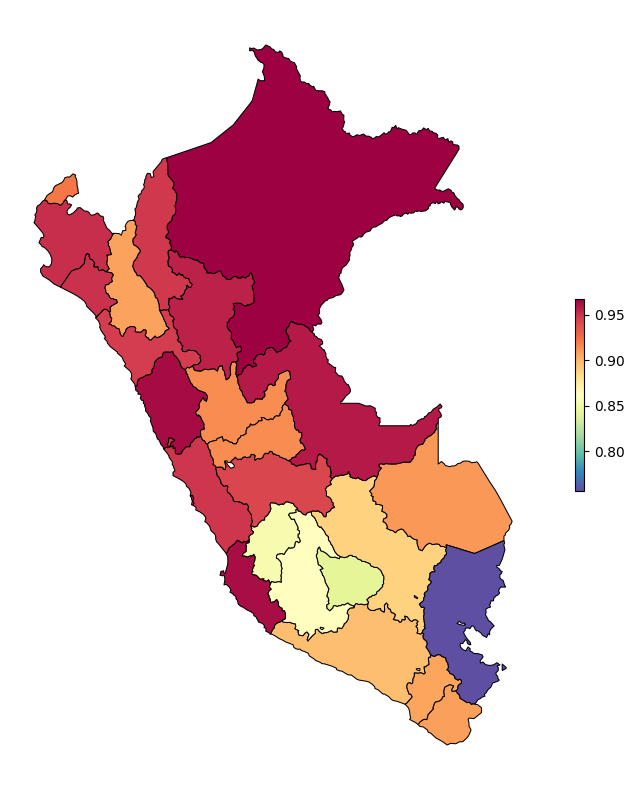

In [13]:
data = pd.merge(gdf, df, on="region")

fig, ax = plt.subplots(figsize=(8, 8), dpi=100)

data.plot(
    column="epi",
    edgecolor="black",
    lw=0.75,
    cmap="Spectral_r",
    legend=True, 
    legend_kwds=dict(
        shrink=0.25
    ),
    ax=ax
)

ax.axis("off")
fig.tight_layout()